
 DECISION TREE EXPERIMENTS
Model: Decision Tree (max_depth=3)
Accuracy: 0.9723
Classification Report:
              precision    recall  f1-score   support

           0     0.9706    1.0000    0.9851     18300
           1     1.0000    0.6741    0.8053      1700

    accuracy                         0.9723     20000
   macro avg     0.9853    0.8371    0.8952     20000
weighted avg     0.9731    0.9723    0.9698     20000

Confusion Matrix:
[[18300     0]
 [  554  1146]]
Model: Decision Tree (max_depth=4)
Accuracy: 0.8014
Classification Report:
              precision    recall  f1-score   support

           0     0.9920    0.7894    0.8792     18300
           1     0.2912    0.9312    0.4436      1700

    accuracy                         0.8014     20000
   macro avg     0.6416    0.8603    0.6614     20000
weighted avg     0.9324    0.8014    0.8421     20000

Confusion Matrix:
[[14446  3854]
 [  117  1583]]
Model: Decision Tree (max_depth=6)
Accuracy: 0.8588
Classification Rep

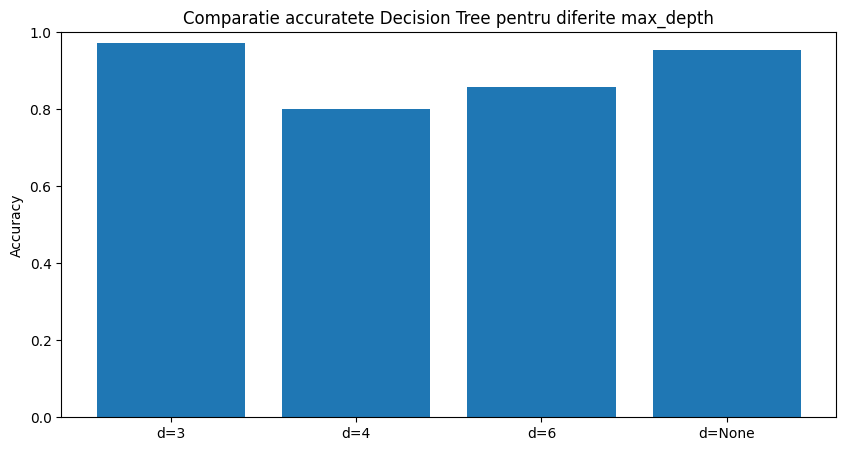

Model: Random Forest (50 trees)
Accuracy: 0.9138
Classification Report:
              precision    recall  f1-score   support

           0     0.9891    0.9158    0.9511     18300
           1     0.4961    0.8918    0.6375      1700

    accuracy                         0.9138     20000
   macro avg     0.7426    0.9038    0.7943     20000
weighted avg     0.9472    0.9138    0.9244     20000

Confusion Matrix:
[[16760  1540]
 [  184  1516]]
Model: Random Forest (300 trees)
Accuracy: 0.9092
Classification Report:
              precision    recall  f1-score   support

           0     0.9901    0.9099    0.9483     18300
           1     0.4818    0.9018    0.6280      1700

    accuracy                         0.9092     20000
   macro avg     0.7359    0.9058    0.7882     20000
weighted avg     0.9469    0.9092    0.9211     20000

Confusion Matrix:
[[16651  1649]
 [  167  1533]]
Model: Random Forest (1000 trees)
Accuracy: 0.9077
Classification Report:
              precision    re

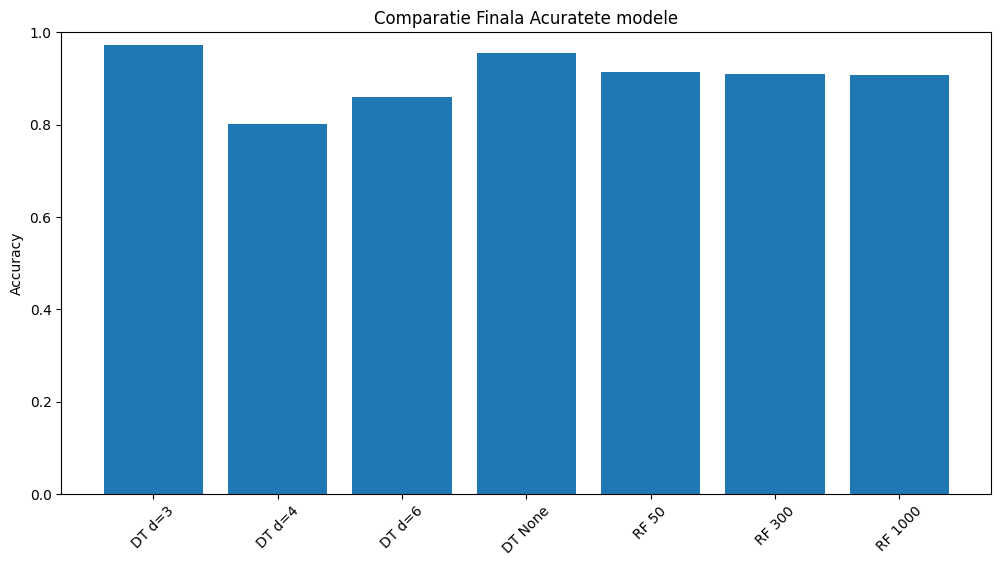

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv(r"C:\Users\Administrator\Downloads\dataset\diabetes_prediction_dataset.csv")

TARGET_COLUMN = "diabetes"
y = df[TARGET_COLUMN].astype(int)
X = df.drop(columns=[TARGET_COLUMN])

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()


preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([("imputer", SimpleImputer(strategy="median"))]), numeric_features),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_features),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


def run_model(model, name):
    clf = Pipeline(steps=[
        ("prep", preprocess),
        ("model", model)
    ])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    return acc, clf


depth_values = [3, 4, 6, None]
dt_results = {}

print("\n DECISION TREE EXPERIMENTS")

for depth in depth_values:
    model = DecisionTreeClassifier(
        max_depth=depth,
        class_weight="balanced",
        random_state=42
    )

    acc, clf = run_model(model, f"Decision Tree (max_depth={depth})")
    dt_results[f"Decision Tree (max_depth={depth})"] = acc

# Plot comparativ pt Decision Tree
plt.figure(figsize=(10, 5))
plt.bar(
    ["d=3", "d=4", "d=6", "d=None"],
    list(dt_results.values())
)
plt.title("Comparatie accuratete Decision Tree pentru diferite max_depth")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()



rf_configs = {
    "Random Forest (50 trees)": RandomForestClassifier(
        n_estimators=50, max_depth=10, min_samples_leaf=4,
        min_samples_split=10, class_weight="balanced",
        random_state=42, n_jobs=-1
    ),
    "Random Forest (300 trees)": RandomForestClassifier(
        n_estimators=300, max_depth=10, min_samples_leaf=4,
        min_samples_split=10, class_weight="balanced",
        random_state=42, n_jobs=-1
    ),
    "Random Forest (1000 trees)": RandomForestClassifier(
        n_estimators=1000, max_depth=10, min_samples_leaf=4,
        min_samples_split=10, class_weight="balanced",
        random_state=42, n_jobs=-1
    )
}

results = {}

for name, model in rf_configs.items():
    acc, clf = run_model(model, name)
    results[name] = acc



print("ACCURACY COMPARISON:")
for name, acc in dt_results.items():
    print(f"{name}: {acc:.4f}")

for name, acc in results.items():
    print(f"{name}: {acc:.4f}")

plt.figure(figsize=(12, 6))
plt.bar(
    ["DT d=3", "DT d=4", "DT d=6", "DT None", "RF 50", "RF 300", "RF 1000"],
    [
        dt_results["Decision Tree (max_depth=3)"],
        dt_results["Decision Tree (max_depth=4)"],
        dt_results["Decision Tree (max_depth=6)"],
        dt_results["Decision Tree (max_depth=None)"],
        results["Random Forest (50 trees)"],
        results["Random Forest (300 trees)"],
        results["Random Forest (1000 trees)"]
    ]
)
plt.title("Comparatie Finala Acuratete modele")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()
